In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
from  data_loader import load_tokyo_temp
y, m, temp = load_tokyo_temp()

In [3]:
temp = temp[(1880 <= y)*(y <=2019)]
m = m[(1880 <= y)*(y <=2019)]
y = y[(1880 <= y)*(y <=2019)]

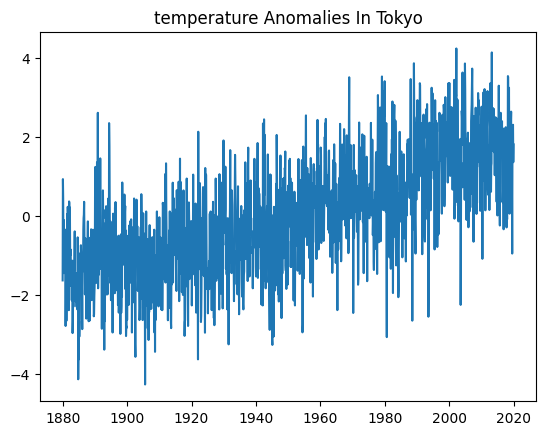

In [4]:
temp_clim = np.zeros((12))
for mm in range(1, 13):
    temp_clim[mm-1] = np.nanmean(temp[m==mm], 0)

tempa = np.zeros((temp.shape))

for yy in range(1880, 2020):
    for mm in range(1, 13):
        tempa[(y==yy)*(m==mm)] = temp[(y==yy)*(m==mm)] - temp_clim[mm-1]

mon = np.arange(1880, 2020, 1/12)
plt.plot(mon, tempa)
plt.title('temperature Anomalies In Tokyo')
plt.show()        

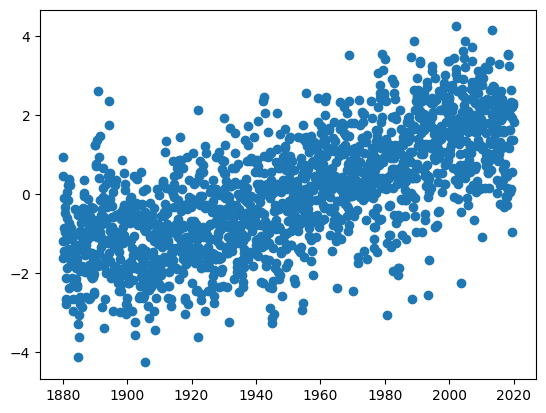

In [5]:
plt.scatter(mon, tempa)
plt.show()

In [6]:
[a, b] = np.polyfit(mon, tempa, 1)

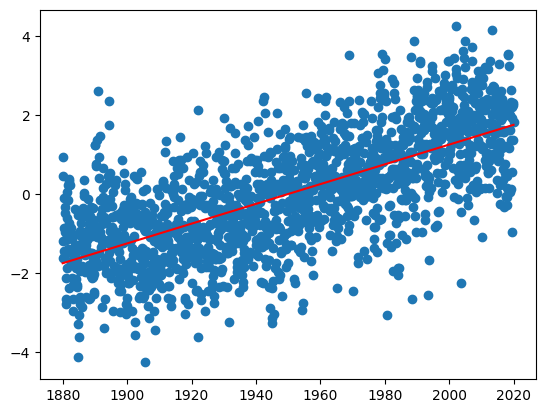

In [7]:
plt.scatter(mon, tempa)
plt.plot(mon, a*mon + b, 'r')
plt.show()

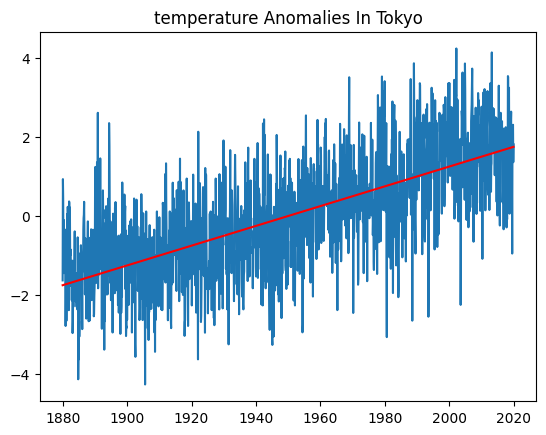

In [8]:
plt.plot(mon, tempa)
plt.plot(mon, a*mon + b, 'r')
plt.title('temperature Anomalies In Tokyo')
plt.show()            

In [9]:
# Regression coefficients(per year)
a

0.025054090509550334

## 5.4 Detrending(removal linear trend)

### 5.4.1

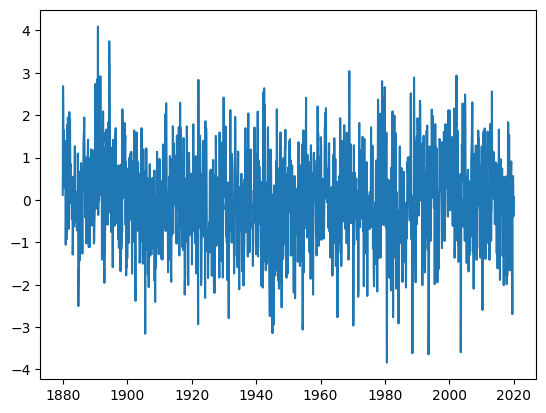

In [10]:
detrended_tempa = tempa - (a * mon + b)
plt.plot(mon, detrended_tempa)
plt.show()

### 5.4.2 detrending using scipy(same result)

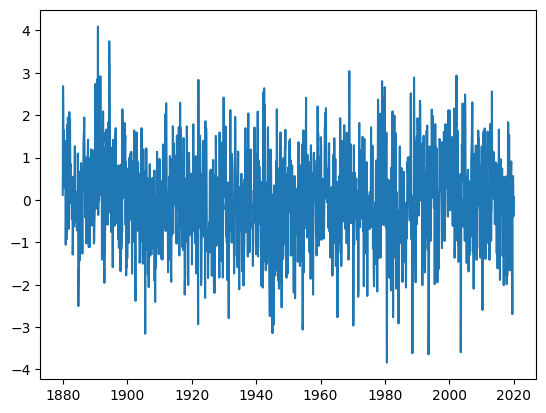

In [11]:
# same result using scipy
from scipy import signal

detrended_tempa_scipy = signal.detrend(tempa)

plt.plot(mon, detrended_tempa_scipy)
plt.show()

## 5.5 draw sst trends

### 5.5.1 load data

In [12]:
from  data_loader import load_ssta
ssta, lon2, lat2, y, m = load_ssta()

### 5.2

In [13]:
[imt, jmt, tmt] = ssta.shape
a_ssta = np.zeros((imt, jmt))
b_ssta = np.zeros((imt, jmt))
detrended_ssta = np.zeros((imt, jmt, tmt))

mon = np.arange(1982, 2020, 1/12)

is_land_grids_3D = (np.isnan(ssta)==True)
ssta[is_land_grids_3D] = 0

for ii in range(0, imt):
    for jj in range(0, jmt):
        [a_ssta[ii, jj], b_ssta[ii, jj]] = np.polyfit(mon, ssta[ii, jj, :], 1)
        detrended_ssta[ii, jj, :] = \
            ssta[ii, jj,:] - (a_ssta[ii, jj]*mon + b_ssta[ii, jj])
    if (ii % 30 ==0):
        print(ii)

is_land_grids_2D = np.squeeze(is_land_grids_3D[:, :, 0])
a_ssta[is_land_grids_2D] = np.nan
b_ssta[is_land_grids_2D] = np.nan
detrended_ssta[is_land_grids_2D] = np.nan

0
30
60
90
120
150
180
210
240
270
300
330


In [14]:
savefile = './data/detrended_ssta_OIDDT.npz'
np.savez(savefile, ssta=detrended_ssta, lon2=lon2, lat2=lat2, y=y, m=m)

### 5.5.3 Draw SST trends

Text(0.5, 1.0, 'SST trend')

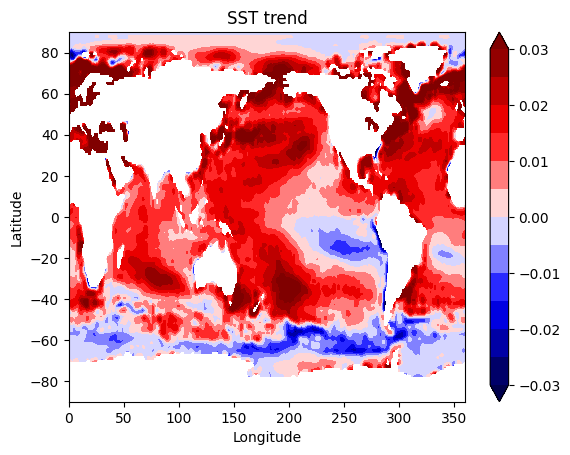

In [15]:
vmin = -0.03
vmax = 0.03
vint = 0.005

plt.figure()
cm = plt.get_cmap('seismic')
cs = plt.contourf(lon2, lat2, a_ssta, \
                  cmap=cm, norm=Normalize(vmin=vmin, vmax=vmax), \
                  levels=np.arange(vmin, vmax+vint, vint), extend='both')
plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
title = 'SST trend'
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.title(title)

## 5.6 Draw  detrended SST Deviations

Text(0.5, 1.0, 'Detrended SST anomalies1997/12')

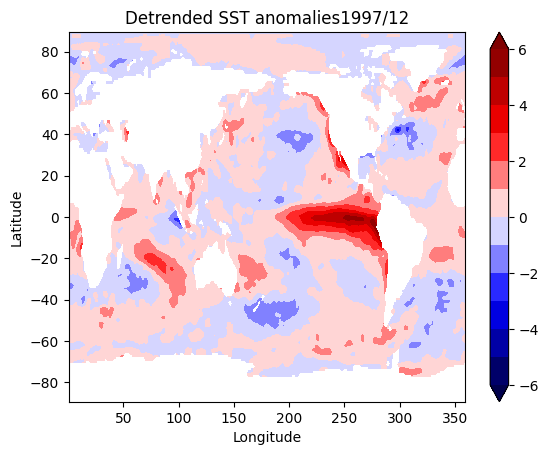

In [16]:
draw_year = 1997
draw_month = 12

vmin = -6
vmax = 6
vint = 1

plt.figure()
cm = plt.get_cmap('seismic')
cs = plt.contourf(lon2, lat2, \
                  np.squeeze(detrended_ssta[:, :, (y==draw_year)*(m==draw_month)]), \
                  cmap=cm, norm=Normalize(vmin=vmin, vmax=vmax), \
                  levels=np.arange(vmin, vmax+vint, vint), extend='both')
plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
title = 'Detrended SST anomalies' + str(draw_year) + '/' + str(draw_month)
plt.title(title)